**Lab 7 and 8: Linear Regression, Debugging, and Outlier Detection (EDA)**

**OBJECTIVES**

  i) To understand and implement Simple Linear Regression, analyze relationships between variables, and interpret the results.

  ii) To perform Exploratory Data Analysis (EDA), detect errors, handle missing values, and identify outliers.

**THEORY**

**Linear Regression:**

Linear Regression is a supervised machine learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features) using a straight line.

It models the relationship between:

     i)Independent variable (X) → Input

    ii) Dependent variable (Y) → Output

Equation of Simple Linear Regression:

𝑌 = 𝑏0 + 𝑏1 . 𝑋

Where:

𝑏0 = Intercept

𝑏1 = Slope

X = Independent variable

Y = Predicted value




**EDA:**

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to understand their main characteristics before applying statistical models or machine learning.


The main goal of EDA is to:

i) Understand the structure of the dataset

ii) Identify patterns and trends

iii) Detect missing values and errors

iv) Find outliers

v) Check relationships between variables

vi) Prepare data for modeling

EDA is a critical first step in any data science or machine learning project.


In [6]:
#Task 1: Load and Inspect Data

In [7]:
#Import Required Libraries
import pandas as pd
import numpy as np

In [8]:
#Load the Dataset
data = pd.read_csv("/headbrain11.csv")

In [9]:
#Display first 5 rowa
data.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [10]:
#Inspect the Dataset
data.shape

(237, 2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Head Size(cm^3)      237 non-null    int64
 1   Brain Weight(grams)  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


In [12]:
#Check Missing Values
data.isnull().sum()

,0
Head Size(cm^3),0
Brain Weight(grams),0


In [13]:
#Summary Statistics
data.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [14]:
#Task 2: Data Cleaning – Renaming Columns

In [15]:
#Rename Columns
data = data.rename(columns={
    'Head Size(cm^3)': 'Head_size',
    'Brain Weight(grams)': 'Brain_weight'
})

In [16]:
data.head()

,Head_size,Brain_weight
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


Why is renaming columns useful for modeling?



1.   Removes Special Characters and Spaces
2.   Improves Code Readability
3.   Prevents Syntax Errors



In [17]:
#Task 3: Exploratory Data Analysis (EDA)

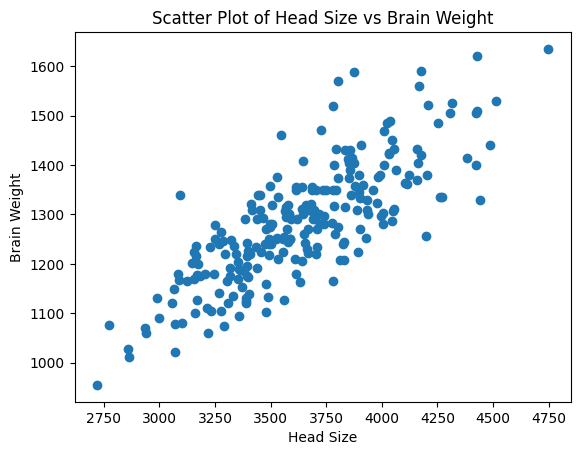

In [18]:
#Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(data['Head_size'], data['Brain_weight'])
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.title("Scatter Plot of Head Size vs Brain Weight")
plt.show()

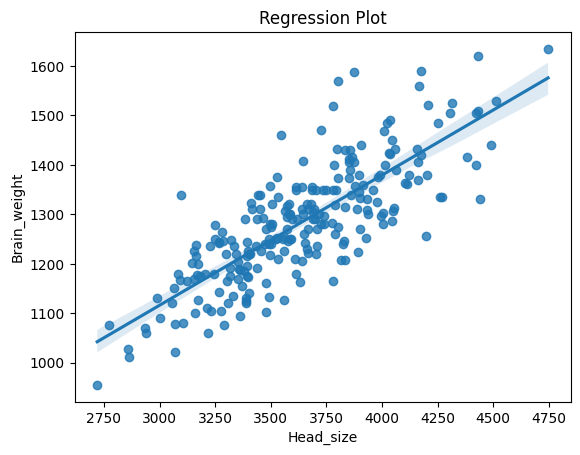

In [19]:
#Regression Plot
sns.regplot(x='Head_size', y='Brain_weight', data=data)
plt.title("Regression Plot")
plt.show()

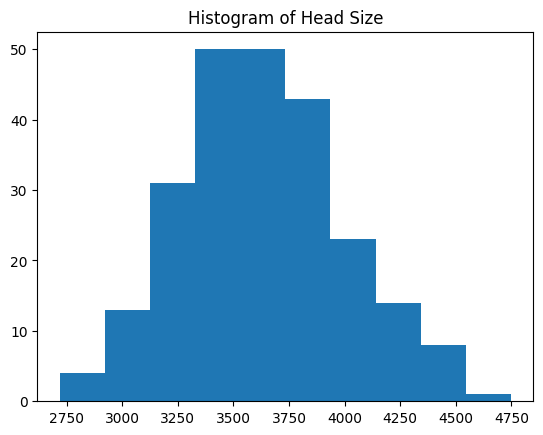

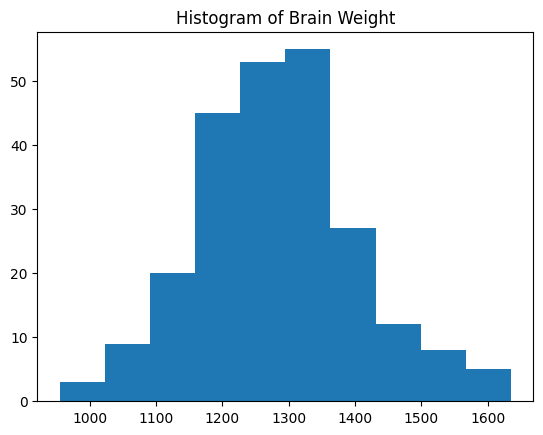

In [20]:
#Histogram of both variables
plt.hist(data['Head_size'], bins=10)
plt.title("Histogram of Head Size")
plt.show()

plt.hist(data['Brain_weight'], bins=10)
plt.title("Histogram of Brain Weight")
plt.show()

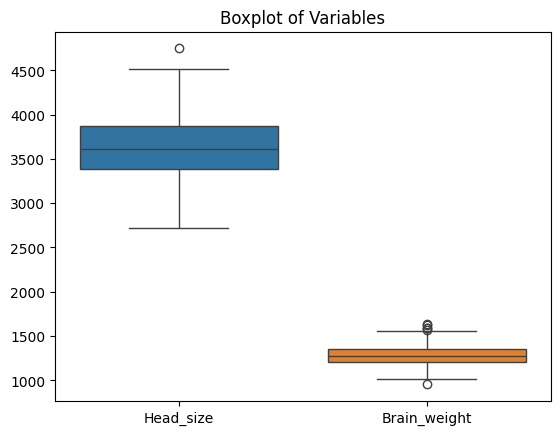

In [21]:
#Box Plot
sns.boxplot(data=data[['Head_size','Brain_weight']])
plt.title("Boxplot of Variables")
plt.show()

Describe the relationship between head size and brain weight.

    The relationship between head size and brain weight appears to be linear and strong. As head size increases, brain weight also increases. The scatterplot and regression plot show that data points follow an upward trend and cluster around a straight line.

    This indicates that head size is a good predictor of brain weight.

Is the relationship positive or negative?

    The relationship is positive.

    1.  When Head_size increases → Brain_weight increases
    2. The regression line has an upward slope

    There is no negative relationship observed.

In [22]:
#Task 4: Fit Linear Regression using Statsmodels (OLS)

In [23]:
#Import Library
import statsmodels.api as sm

In [24]:
#Define Variables
X = data['Head_size']
Y = data['Brain_weight']

In [25]:
#Add Constant (Intercept)
X = sm.add_constant(X)

In [26]:
#Fit the Model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Brain_weight   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 26 Feb 2026   Prob (F-statistic):           5.96e-54
Time:                        14:39:21   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        325.5734     47.141      6.906      0.0

In [27]:
#Task 6 : EDA(Debug)

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [30]:
df = pd.read_csv("/data.csv")  # Load your dataset
df.head()                     # First 5 rows


,age,gender,education_level,income,experience_years,employed
0,22,Male,Bachelor,30000,1,Yes
1,25,Female,Master,45000,3,Yes
2,47,Female,PhD,72000,15,Yes
3,35,Male,Bachelor,50000,8,Yes
4,52,Male,Master,68000,20,No


In [31]:
df.tail()                     # Last 5 rows

,age,gender,education_level,income,experience_years,employed
5,46,Female,PhD,75000,18,Yes
6,29,Male,Bachelor,42000,4,Yes
7,41,Female,Master,61000,12,No
8,33,Female,Bachelor,48000,6,Yes
9,38,Male,PhD,70000,10,Yes


In [32]:
df.info()      # Column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               10 non-null     int64 
 1   gender            10 non-null     object
 2   education_level   10 non-null     object
 3   income            10 non-null     int64 
 4   experience_years  10 non-null     int64 
 5   employed          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [33]:
df.shape       # Number of rows and columns

(10, 6)

In [34]:
df.columns     # Column names

Index(['age', 'gender', 'education_level', 'income', 'experience_years',
       'employed'],
      dtype='object')

In [35]:
df.describe()  # Statistical summary for numeric columns

,age,income,experience_years
count,10.000000,10.00000,10.000000
mean,36.800000,56100.00000,9.700000
std,9.863513,15183.69008,6.481598
min,22.000000,30000.00000,1.000000
25%,30.000000,45750.00000,4.500000
50%,36.500000,55500.00000,9.000000
75%,44.750000,69500.00000,14.250000
max,52.000000,75000.00000,20.000000


In [36]:
df.isnull().sum()  # Count missing values per column

,0
age,0
gender,0
education_level,0
income,0
experience_years,0
employed,0


In [43]:
df['age'].mean()      # Mean

np.float64(36.8)

In [38]:
df['age'].median()    # Median

36.5

In [39]:
df['age'].mode()      # Mode

,age
0,22
1,25
2,29
3,33
4,35
5,38
6,41
7,46
8,47
9,52


In [40]:
df['age'].std()       # Standard Deviation

9.863513009515874

In [41]:
df['age'].var()       # Variance

97.28888888888889

In [42]:
df['age'].min(), df['age'].max()  # Min & Max

(22, 52)

In [44]:
df['age'].quantile([0.25, 0.5, 0.75])  # Quartiles

,age
0.25,30.00
0.50,36.50
0.75,44.75


In [45]:
df['gender'].value_counts()         # Frequency counts

,count
gender,
Male,5
Female,5


In [46]:
df['gender'].value_counts(normalize=True)  # Proportion

,proportion
gender,
Male,0.5
Female,0.5


<Axes: xlabel='age', ylabel='Count'>

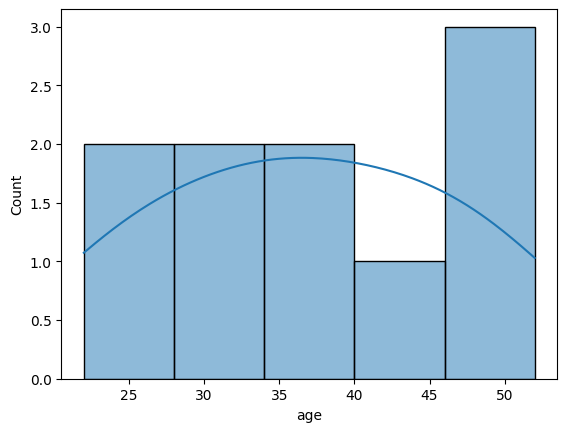

In [47]:
sns.histplot(df['age'], kde=True)  # Histogram

<Axes: xlabel='age'>

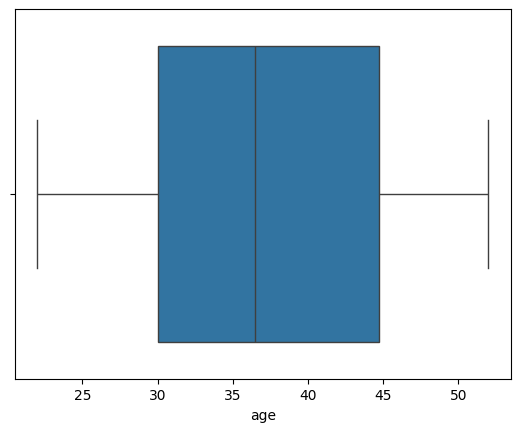

In [48]:
sns.boxplot(x=df['age'])           # Boxplot

<Axes: xlabel='gender', ylabel='count'>

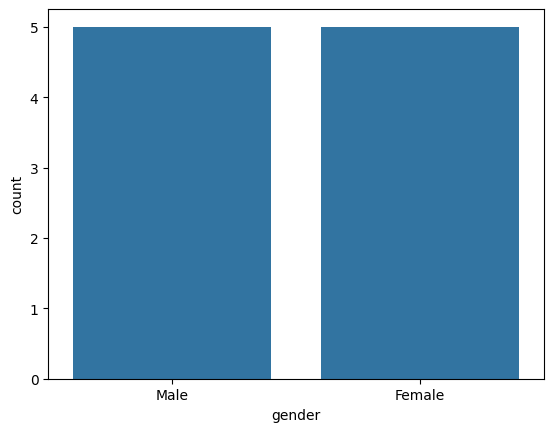

In [49]:
sns.countplot(x='gender', data=df) # Bar chart

In [50]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'gender', 'education_level', 'income', 'experience_years',
       'employed'],
      dtype='object')


<Axes: xlabel='age', ylabel='income'>

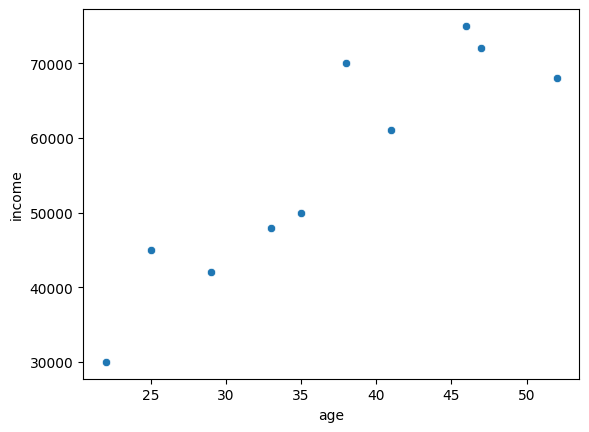

In [51]:
# Suppose actual column name is 'income'
sns.scatterplot(x='age', y='income', data=df)

<Axes: xlabel='gender', ylabel='income'>

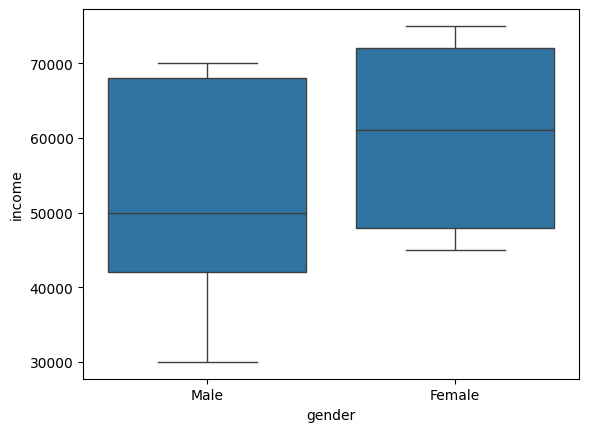

In [52]:
sns.boxplot(x='gender', y='income', data=df)

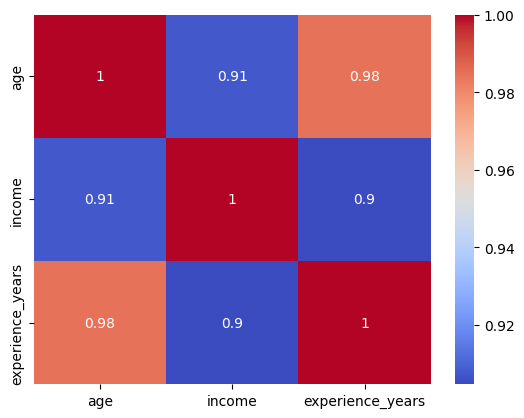

In [53]:
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [54]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'gender', 'education_level', 'income', 'experience_years',
       'employed'],
      dtype='object')
